In [78]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
from itertools import cycle

In [79]:
# read in the data
df = pd.read_csv("payems.csv", skiprows= 5)

In [80]:
# cleaning the data: add datetime index and perform linear interpolaion
df.index = pd.to_datetime(df['date'], format = '%m/%d/%Y')
#df.index = df.index.to_period('M').to_timestamp('M')
del df['date']
df_m = df.resample('MS').interpolate(method = 'linear')

In [81]:
# we will segment the df_m into 14 separate timeseries
peak_list = ['1929-08-01', 
            '1937-05-01',
            '1945-02-01',
            '1948-11-01',
            '1953-07-01',
            '1957-08-01',
            '1960-04-01',
            '1969-12-01',
            '1973-11-01',
            '1980-01-01',
            '1981-07-01',
            '1990-07-01',
            '2001-03-01',
            '2007-12-01'
            ]
for i, date in enumerate(peak_list):
    dfname = str('data')+str(i)
    date_index = pd.to_datetime(date, format = '%Y-%m-%d')
    year = date_index.year
    month = date_index.month
    day = date_index.day
    if date == '1929-08-01' :
        start = pd.to_datetime('1929-07-01')
    else:
        start = pd.to_datetime(str(year-1)+'-'+str(month)+'-'+str(day))
    end = pd.to_datetime(str(year+7)+'-'+str(month)+'-'+str(day))
    df_sub = df_m.loc[(df_m.index >= start)&(df_m.index <= end),:]
    # we will do the normalization now
    base = float(df_sub.loc[(df_sub.index == date_index),'payems'].values)
    jobgrowth  = {date:df_sub.payems.values *(1/base)}
    # we create a new time series with new index label
    if date == '1929-08-01' :
        df_index = range(-1, 85)
    else:
        df_index = range(-12, 85)
    df_result = pd.DataFrame(jobgrowth, index = df_index)
    del df_sub
    vars()[dfname] = df_result

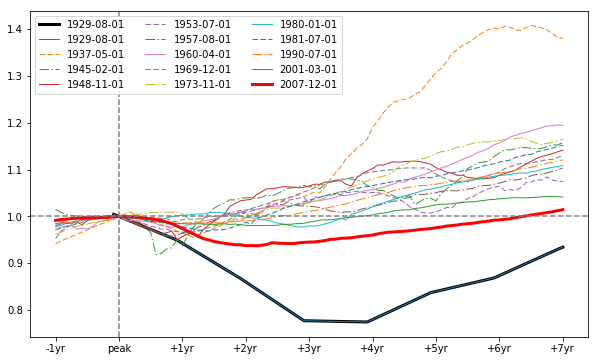

In [89]:
#plotting
# set some linestyle cycler
lines = ["-","--","-."]
linecycler = cycle(lines)
# start plotting
jobgrowth_fig = plt.figure(figsize = (10, 6))

for i, date in enumerate(peak_list):
    data = globals()[str('data')+str(i)]
    if i == 0:
        plt.plot(data.index, data[date], "k-", lw = 3)
    if i == 13:
        plt.plot(data.index, data[date], "r-", lw = 3)
    else:
        plt.plot(data.index, data[date], next(linecycler), lw = 1)

plt.legend(loc = 'upper left', ncol = 3)
xtick_new = [-12, 0, 12, 24, 36, 48, 60, 72, 84]
xticklabel_new = ['-1yr', 'peak', '+1yr', '+2yr', '+3yr', '+4yr', '+5yr', '+6yr', '+7yr']
plt.xticks(xtick_new, xticklabel_new)
plt.axhline(y = 1,  ls = "--", color ="grey")
plt.axvline(x = 0,  ls = "--", color ="grey")
plt.show()

In [90]:
print("There were other recessions worse than the Great Recession, especially during the first year of the peak. \nHowever, what makes the Great Recession difference is its long lasting negative impact on jo growth, which only came back to peak level after 7 years")

There were other recessions worse than the Great Recession, especially during the first year of the peak. 
However, what makes the Great Recession difference is its long lasting negative impact on jo growth, which only came back to peak level after 7 years


In [77]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
